## Testing LTSM

Based on following the Timeseries forecasting tutorial on tensorflow's website: https://www.tensorflow.org/tutorials/structured_data/time_series

In [1]:
import os
import datetime

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

## Extract Data

In [5]:
GC = pd.read_csv("./data/stats_GC.csv", index_col = 0, parse_dates=True)
OS = pd.read_csv("./data/stats_offshore.csv", index_col=0, parse_dates=True)

In order to understand the more complex 1d spectrum data we first need to determine what feature engineering might be required to help the model understand some of the nuisences of the data. For example, is there seasonal pattern.

<Axes: xlabel='time'>

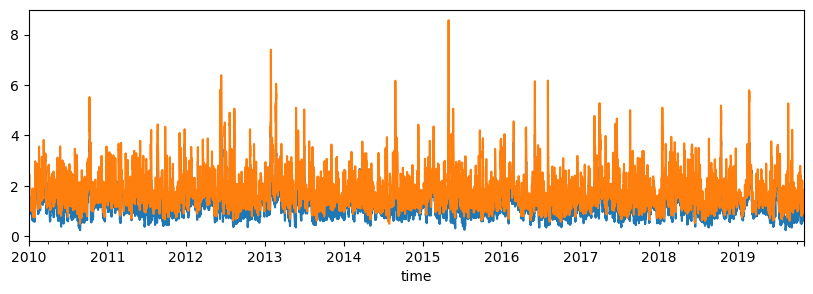

In [9]:
GC.hs.plot(figsize= (10,3))
OS.hs.plot()

It's hard to determine any seassonal pattern from displaying the data initally, but perhaps if we consider re-factoring the data we may be able to see a pattern emerge.

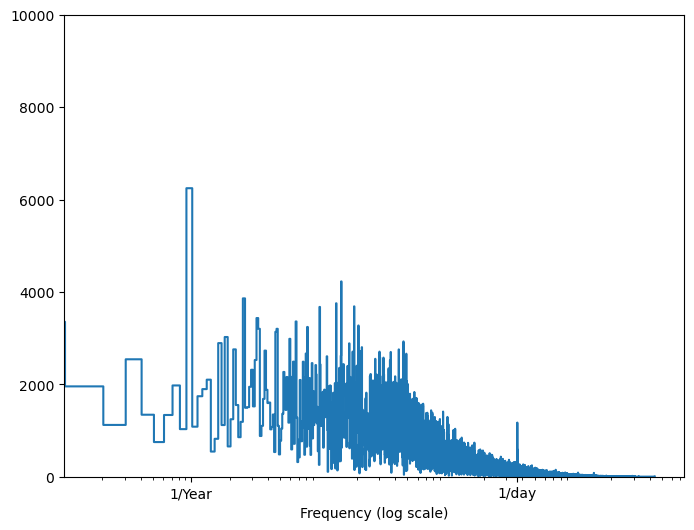

In [13]:
fft = tf.signal.rfft(OS['hs'])
f_per_dataset = np.arange(0, len(fft))

n_samples_h = len(OS['hs'])
hours_per_year = 24*365.2524
years_per_dataset = n_samples_h/(hours_per_year)

f_per_year = f_per_dataset/years_per_dataset
plt.step(f_per_year, np.abs(fft))
plt.xscale('log')
plt.ylim(0, 10000)
plt.xlim([0.1, max(plt.xlim())])
plt.xticks([1, 365.2524], labels=['1/Year', '1/day'])
_ = plt.xlabel('Frequency (log scale)')

There FFT appears to have pickud up some small 1yr and 1 day relationshps. This means we may need to consider some time elements in our training data to ensure that is captured well in the model.